## A basic set of tools for visualizing FESOM2.0 simulations

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
## import standard python packages

In [3]:
# import standard python packages
import sys
import numpy as np
#import cartopy.crs as ccrs
#import cartopy.feature as cfeature
# import basemap
from mpl_toolkits.basemap import Basemap
# import FESOM packages
sys.path.append("./modules/")
from load_mesh_data import *
from regriding import fesom2clim, fesom2regular, create_indexes_and_distances
sys.path.append("/home/h/hbkdsido/utils/seawater-1.1/")
import seawater as sw
from fesom_plot_tools import *
import cmocean.cm as cmo
from matplotlib import cm
import matplotlib 
from dask.distributed import LocalCluster, Client
fontsize=12
matplotlib.rc('xtick', labelsize=fontsize) 
matplotlib.rc('ytick', labelsize=fontsize) 
import xarray as xr
import joblib
import dask.array as da
from ut import vec_rotate_r2g, scalar_g2r
sys.path.append("/home/ollie/nkolduno/PYTHON/cmclimate/")
import cmclimate as cmc
from matplotlib.colors import ListedColormap

Might also be good cmaps

    BkBlAqGrYeOrReViWh200
    MPL_RdYlGn
    BlueDarkRed18
    GMT_pola
    precip_diff_12lev
    nrl_sirkes
    NCV_jaisnd
    precip4_diff_19lev

## read the mesh

In [4]:
# set the path to the mesh
#meshpath  ='/home/ollie/nkolduno/meshes/pi-grid/'
meshpath  ='/work/ollie/pscholz/mesh_fesom2.0/mesh_CORE2_finaltopo_mean/'
#meshpath  ='/work/ollie/ogurses/NATMAP/mesh_F2GLO08/'
alpha, beta, gamma=[50, 15, -90]
# alpha, beta, gamma=[0, 0, 0]
try:
	mesh
except NameError:
	print("mesh will be loaded")
	mesh=load_mesh(meshpath, abg=[alpha, beta, gamma], usepickle = False, usejoblib=False)
else:
	print("mesh with this name already exists and will not be loaded")
    
elem2=mesh.elem[mesh.no_cyclic_elem,:]
voltri = mesh.voltri[mesh.no_cyclic_elem]

mesh will be loaded
Load 2d part of the grid in 15 second(s)


In [5]:
diag = Dataset('/work/ollie/nkolduno/output_ENERGY/fesom.mesh.diag.nc')
nlevels = diag.variables['nlevels'][:]
nod_area = diag.variables['nod_area'][:]
elem_area = diag.variables['elem_area'][:]
nlevels_nod2D = diag.variables['nlevels_nod2D'][:]

In [6]:
result_path ='/work/ollie/dsidoren/EKE/'
stime = '1958-01-01'
etime = '1990-12-31'

In [7]:
%%time
nn = np.zeros((nlevels_nod2D.shape[0], 47))
nn[:][:]=1

CPU times: user 6.26 ms, sys: 19.6 ms, total: 25.9 ms
Wall time: 25 ms


In [8]:
%%time
nn = np.zeros((nlevels_nod2D.shape[0], 47))
for i, j in enumerate(nlevels_nod2D):
    if j==3:
        nn[i][:j-3] = 1
    elif j==4:
        nn[i][:j-4] = 1
    else:
        nn[i][:j-5] = 1
        

CPU times: user 1.18 s, sys: 25.1 ms, total: 1.2 s
Wall time: 1.2 s


In [9]:
%%time
nn = np.zeros((nlevels_nod2D.shape[0], 47))
for i, j in enumerate(nlevels_nod2D):
    nn[i][:j-1] = 1

CPU times: user 821 ms, sys: 27.3 ms, total: 848 ms
Wall time: 847 ms


In [10]:
runid ='fesom'
year = "19??"
ncfile1 = xr.open_mfdataset(result_path+'wrhof'    +'.'+runid+'.'+str(year)+'.nc')
ncfile2 = xr.open_mfdataset(result_path+'w'       +'.'+runid+'.'+str(year)+'.nc')
ncfile3 = xr.open_mfdataset(result_path+'rhof'     +'.'+runid+'.'+str(year)+'.nc')
# ncfile4 = xr.open_dataset(result_path+'w'           +'.'+runid+'.'+str(year)+'.nc', chunks={'time':1})

#stime = '1949-01-01'
#etime = '1960-12-31'
# .sel(time=slice(stime, etime)).mean(dim='time')
wrhof = ncfile1['wrhof'].sel(time=slice(stime, etime)).mean(dim='time')
w     = ncfile2['w'].sel(time=slice(stime, etime)).mean(dim='time')
rhof  = ncfile3['rhof'].sel(time=slice(stime, etime)).mean(dim='time')

In [11]:
runid ='fesom'
year = "19??"

ncfile1  = xr.open_mfdataset(result_path+'utau_surf' +'.'+runid+'.'+str(year)+'.nc')
ncfile2  = xr.open_mfdataset(result_path+'tx_sur'    +'.'+runid+'.'+str(year)+'.nc')
ncfile3  = xr.open_mfdataset(result_path+'ty_sur'    +'.'+runid+'.'+str(year)+'.nc')
ncfile4  = xr.open_mfdataset(result_path+'u_surf'    +'.'+runid+'.'+str(year)+'.nc')
ncfile5  = xr.open_mfdataset(result_path+'v_surf'    +'.'+runid+'.'+str(year)+'.nc')

ncfile6   = xr.open_mfdataset(result_path+'utau_bott' +'.'+runid+'.'+str(year)+'.nc')
ncfile7   = xr.open_mfdataset(result_path+'u_bott'    +'.'+runid+'.'+str(year)+'.nc')
ncfile8   = xr.open_mfdataset(result_path+'v_bott'    +'.'+runid+'.'+str(year)+'.nc')
ncfile9   = xr.open_mfdataset(result_path+'tx_bot'    +'.'+runid+'.'+str(year)+'.nc')
ncfile10  = xr.open_mfdataset(result_path+'ty_bot'    +'.'+runid+'.'+str(year)+'.nc')

ncfile11  = xr.open_mfdataset(result_path+'Av'+'.'+runid+'.'+str(year)+'.nc')
ncfile12  = xr.open_mfdataset(result_path+'av_dudz_sq'  +'.'+runid+'.'+str(year)+'.nc')
ncfile13  = xr.open_mfdataset(result_path+'dudz'        +'.'+runid+'.'+str(year)+'.nc')
ncfile14  = xr.open_mfdataset(result_path+'dvdz'        +'.'+runid+'.'+str(year)+'.nc')
ncfile15  = xr.open_mfdataset(result_path+'av_dudz'     +'.'+runid+'.'+str(year)+'.nc')
ncfile16  = xr.open_mfdataset(result_path+'av_dvdz'     +'.'+runid+'.'+str(year)+'.nc')

###surface contribution
utau_surf = ncfile1['utau_surf'].sel(time=slice(stime, etime)).mean(dim='time')
tx_sur    = ncfile2['tx_sur'].sel(time=slice(stime, etime)).mean(dim='time')
ty_sur    = ncfile3['ty_sur'].sel(time=slice(stime, etime)).mean(dim='time')
u_surf    = ncfile4['u_surf'].sel(time=slice(stime, etime)).mean(dim='time')
v_surf    = ncfile5['v_surf'].sel(time=slice(stime, etime)).mean(dim='time')

###bottom contribution
utau_bott = ncfile6['utau_bott'].sel(time=slice(stime, etime)).mean(dim='time')
u_bott    = ncfile7['u_bott'].sel(time=slice(stime, etime)).mean(dim='time')
v_bott    = ncfile8['v_bott'].sel(time=slice(stime, etime)).mean(dim='time')
tx_bot    = ncfile9['tx_bot'].sel(time=slice(stime, etime)).mean(dim='time')
ty_bot    = ncfile10['ty_bot'].sel(time=slice(stime, etime)).mean(dim='time')

### vertical integral
av         = ncfile11['Av'].sel(time=slice(stime, etime)).mean(dim='time')
av_dudz_sq = ncfile12['av_dudz_sq'].sel(time=slice(stime, etime)).mean(dim='time')
dudz       = ncfile13['dudz'].sel(time=slice(stime, etime)).mean(dim='time')
dvdz       = ncfile14['dvdz'].sel(time=slice(stime, etime)).mean(dim='time')
av_dudz    = ncfile15['av_dudz'].sel(time=slice(stime, etime)).mean(dim='time')
av_dvdz    = ncfile16['av_dvdz'].sel(time=slice(stime, etime)).mean(dim='time')

In [12]:
year = "19??"
ncfile1   = xr.open_mfdataset(result_path+'w'       +'.'+runid+'.'+str(year)+'.nc')
ncfile2   = xr.open_mfdataset(result_path+'dudx'    +'.'+runid+'.'+str(year)+'.nc')
ncfile3   = xr.open_mfdataset(result_path+'dudy'    +'.'+runid+'.'+str(year)+'.nc')
ncfile4   = xr.open_mfdataset(result_path+'dvdx'    +'.'+runid+'.'+str(year)+'.nc')
ncfile5   = xr.open_mfdataset(result_path+'dvdy'    +'.'+runid+'.'+str(year)+'.nc')
ncfile6   = xr.open_mfdataset(result_path+'dudz'    +'.'+runid+'.'+str(year)+'.nc')
ncfile7   = xr.open_mfdataset(result_path+'dvdz'    +'.'+runid+'.'+str(year)+'.nc')
ncfile8   = xr.open_mfdataset(result_path+'u'       +'.'+runid+'.'+str(year)+'.nc')
ncfile9   = xr.open_mfdataset(result_path+'v'       +'.'+runid+'.'+str(year)+'.nc')
ncfile10  = xr.open_mfdataset(result_path+'uu'      +'.'+runid+'.'+str(year)+'.nc')
ncfile11  = xr.open_mfdataset(result_path+'vv'      +'.'+runid+'.'+str(year)+'.nc')
ncfile12  = xr.open_mfdataset(result_path+'uv'      +'.'+runid+'.'+str(year)+'.nc')
ncfile13  = xr.open_mfdataset(result_path+'uw'      +'.'+runid+'.'+str(year)+'.nc')
ncfile14  = xr.open_mfdataset(result_path+'vw'      +'.'+runid+'.'+str(year)+'.nc')

w        = ncfile1['w'].sel(time=slice(stime, etime)).mean(dim='time')
dudx     = ncfile2['dudx'].sel(time=slice(stime, etime)).mean(dim='time')
dudy     = ncfile3['dudy'].sel(time=slice(stime, etime)).mean(dim='time')
dvdx     = ncfile4['dvdx'].sel(time=slice(stime, etime)).mean(dim='time')
dvdy     = ncfile5['dvdy'].sel(time=slice(stime, etime)).mean(dim='time')
dudz     = ncfile6['dudz'].sel(time=slice(stime, etime)).mean(dim='time')
dvdz     = ncfile7['dvdz'].sel(time=slice(stime, etime)).mean(dim='time')
u        = ncfile8['u'].sel(time=slice(stime, etime)).mean(dim='time')
v        = ncfile9['v'].sel(time=slice(stime, etime)).mean(dim='time')
uu       = ncfile10['uu'].sel(time=slice(stime, etime)).mean(dim='time')
vv       = ncfile11['vv'].sel(time=slice(stime, etime)).mean(dim='time')
uv       = ncfile12['uv'].sel(time=slice(stime, etime)).mean(dim='time')
uw       = ncfile13['uw'].sel(time=slice(stime, etime)).mean(dim='time')
vw       = ncfile14['vw'].sel(time=slice(stime, etime)).mean(dim='time')

In [13]:
#m = Basemap(projection='npstere',lon_0=0, boundinglat=70, resolution='l')
m = Basemap(projection='robin',lon_0=0, resolution='l')

x, y = m(mesh.x2, mesh.y2)
# glon, glat = 58.9204963169648 ,        70.4947698223998
# glon, glat = 68.1264949681909   ,     77.1459776133110
# lli = np.where((mesh.x2.astype('float32') == glon)&(mesh.y2.astype('float32') == glat))
# xb, yb = m(mesh.x2[lli], mesh.y2[lli])
# xb, yb = m(mesh.x2[14206134], mesh.y2[14206134])

In [14]:
from matplotlib import ticker
import calendar
sfmt=ticker.ScalarFormatter(useMathText=True) 
sfmt.set_powerlimits((0, 0))

In [15]:
mke_hor  =-(uu)*(dudx)-(vv)*(dvdy)-uv*(dudy+dvdx)
mke_ver  =-(uw)*dudz-(vw)*dvdz
mke_hor_m=(mke_hor*np.diff(mesh.zlev*-1)).sum(axis=1)
mke_ver_m=(.5*(mke_ver[:,:-1]+mke_ver[:,1:])*np.diff(mesh.zlev*-1)).sum(axis=1)

In [16]:
mke_hor_z  =(mke_hor[:,:]*nod_area[:-1,:].T).sum(axis=0)
mke_ver_z  =(mke_ver[:,:].T*elem_area)

#mke_hor_NET=(mke_hor_z*np.diff(mesh.zlev*-1)).sum().compute()
#mke_ver_NET=0.5*(mke_ver_z[:-1,:]+mke_ver_z[1:,:])*np.diff(mesh.zlev*-1)

In [17]:
#i=10
#mke_hor[mke_hor[:,i] > 0.9*mke_hor[:,i].max(),i]=0.

In [18]:
mke_hor_NET=(mke_hor_z*np.diff(mesh.zlev*-1)).sum().compute()
mke_hor_NET

<xarray.DataArray ()>
array(21374281.077123)

In [19]:
mke_ver_NET=0.5*((mke_ver_z[:-1,:]+mke_ver_z[1:,:]).sum(axis=1)*np.diff(mesh.zlev*-1)).sum().compute()
mke_ver_NET

<xarray.DataArray ()>
array(-8583793.737928)

In [20]:
np.array([mke_hor_NET, mke_ver_NET])*1.e-9
#mke_hor_NET/mke_ver_NET

array([ 0.02137428, -0.00858379])

Text(0, 0.5, 'depth [m]')

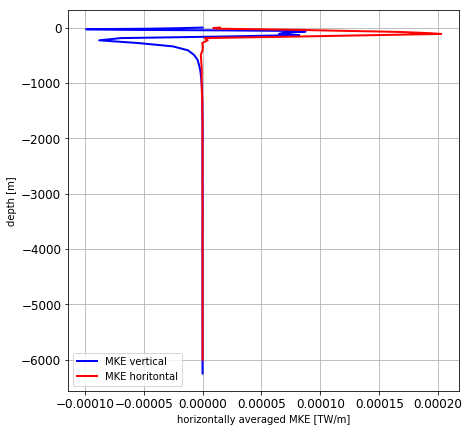

In [21]:
hp=plt.figure(figsize=(7,7))
plt.plot(mke_ver_z.sum(axis=1)*1.e-9, mesh.zlev, linewidth=2, color='b', label='MKE vertical')
plt.plot(mke_hor_z*1.e-9, mesh.zlev[:-1], linewidth=2, color='r', label='MKE horitontal')
plt.legend()
plt.grid()
plt.xlabel('horizontally averaged MKE [TW/m]')
plt.ylabel('depth [m]')

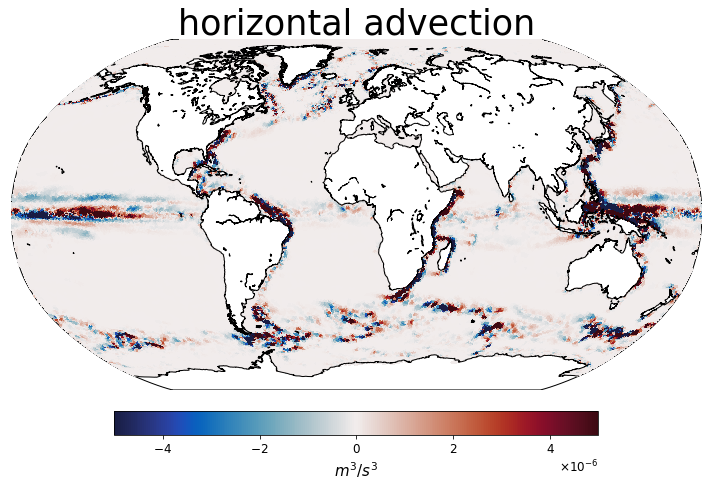

In [22]:
vmin=-5.e-6
vmax=5.e-6
steps = 50
plt.figure(figsize=(10,10))
m.drawmapboundary()
m.drawcoastlines()
mm = plt.tripcolor(x, y, elem2, mke_hor_m, edgecolors='none', cmap=cmo.balance, vmin = vmin, vmax = vmax)
desc="horizontal advection"
cbartext = '${m^3}/{s^3}$'
cb = plt.colorbar(mm, orientation = 'horizontal', shrink=0.7, pad = 0.03, format=sfmt)
cb.ax.set_xlabel(cbartext, size = 15)
plt.title(desc, size = 35)
plt.tight_layout()

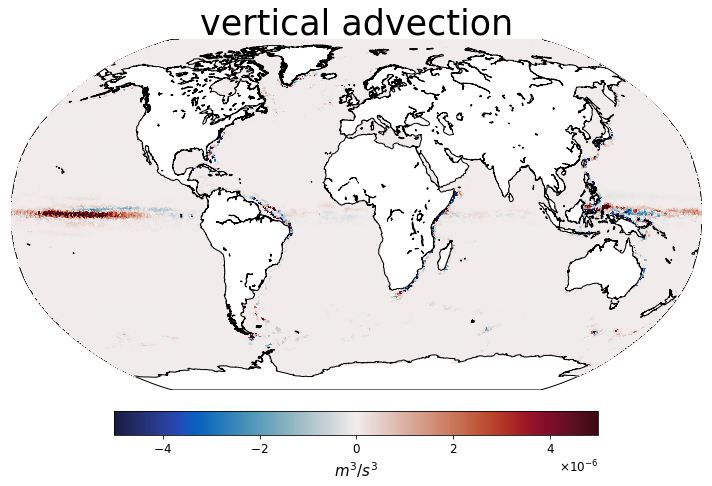

In [23]:
vmin=-5.e-6
vmax=5.e-6
steps = 50
plt.figure(figsize=(10,10))
m.drawmapboundary()
m.drawcoastlines()
mm = plt.tripcolor(x, y, elem2, mke_ver_m[mesh.no_cyclic_elem], edgecolors='none', cmap=cmo.balance, vmin = vmin, vmax = vmax)
desc="vertical advection"
cbartext = '${m^3}/{s^3}$'
cb = plt.colorbar(mm, orientation = 'horizontal', shrink=0.7, pad = 0.03, format=sfmt)
cb.ax.set_xlabel(cbartext, size = 15)
plt.title(desc, size = 35)
plt.tight_layout()

In [24]:
%%time
wrho_m1      =-9.8/1024.*(.5*(wrhof[:,0:-1]+wrhof[:,1:])*nn*np.diff(mesh.zlev*-1)).sum(axis=1).compute()
wrho_m11     =-9.8/1024.*wrhof.data[:,:].compute()[mesh.elem,:].mean(axis=1)
wrho_m11[av_dudz_sq==0]=0.

#
mask=np.where(w==0)
wrhof2=w*rhof
res=.5*(wrhof2[:,0:-1]+wrhof2[:,1:])*nn
wrho_m2      =-9.8/1024.*(res*np.diff(mesh.zlev*-1)).sum(axis=1).compute()
wrho_m22     =-9.8/1024.*wrhof2.data[:,:].compute()[mesh.elem,:].mean(axis=1)
wrho_m22[av_dudz_sq==0]=0.

wrhof3=w*(rhof+1000.)
res=.5*(wrhof3[:,0:-1]+wrhof3[:,1:])*nn
wrho_m3      =-9.8/1024.*(res*np.diff(mesh.zlev*-1)).sum(axis=1).compute()

CPU times: user 35.9 s, sys: 2min 15s, total: 2min 51s
Wall time: 17.5 s


In [25]:
# fields given at faces (w*rho)
source=wrhof
res=(source[:,:]*nod_area[:,:].T).sum(axis=0)
res2=.5*(res[0:-1]+res[1:])
wrho_NET=-9.8/1024.*(res2*np.diff(mesh.zlev*-1)).sum().compute()

/home/ollie/dsidoren/miniconda3/lib/python3.5/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'edgecolors'
  s)


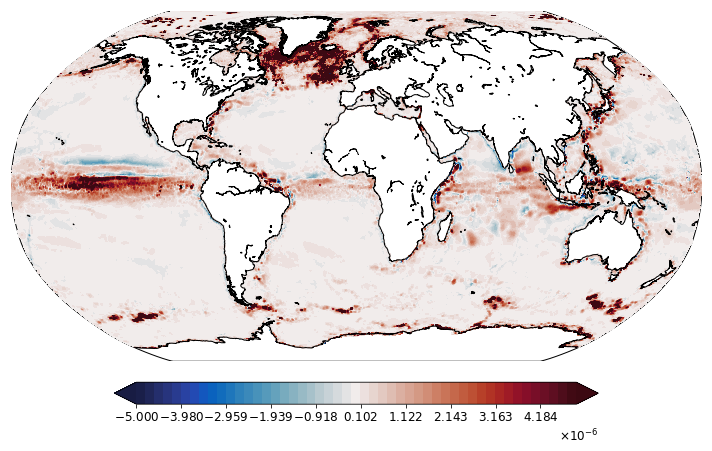

In [26]:
vmin=-5.e-6
vmax=5.e-6
steps = 50

plt.figure(figsize=(10,10))
m.drawmapboundary()
m.drawcoastlines()
mm = plt.tricontourf(x, y, elem2, (wrho_m1-wrho_m2), \
              #facecolors=topo[mesh.no_cyclic_elem], \
              edgecolors='k',\
             cmap=cmo.balance, 
             levels= np.round(np.linspace(vmin, vmax, steps), 20),
               extend='both')
# plt.scatter(xb, yb, 300, marker='x', color='k', zorder=10)
plt.colorbar(mm, orientation='horizontal', pad=0.03, shrink=0.7, format=sfmt);
plt.tight_layout()

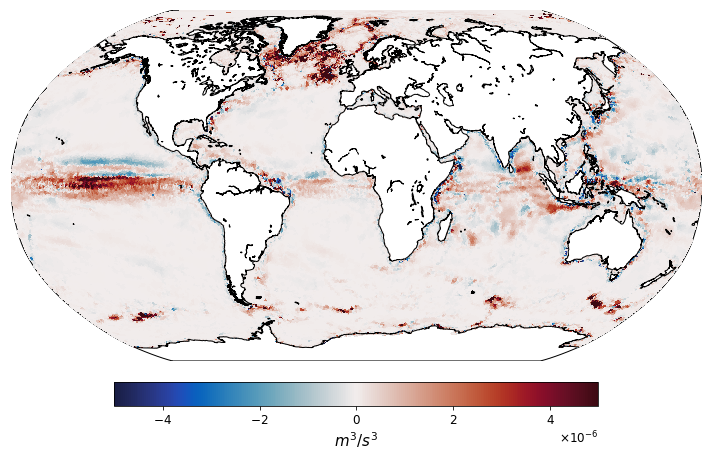

In [27]:
vmin=-5.e-6
vmax=5.e-6
steps = 50
data1=(.5*(wrho_m11[:,:-1]+wrho_m11[:,1:])*np.diff(mesh.zlev*-1)).sum(axis=1)
data2=(.5*(wrho_m22[:,:-1]+wrho_m22[:,1:])*np.diff(mesh.zlev*-1)).sum(axis=1)
data=data1-data2
# data = data_ssh_rhs
# data = data_rhs_diag-data_ssh_rhs
# data = (data_rhs_diag-data_ssh_rhs)/data_ssh_rhs
plt.figure(figsize=(10,10))
m.drawmapboundary()
m.drawcoastlines()
#mm = plt.tripcolor(x, y, elem2, visc_m[mesh.no_cyclic_elem].compute(), edgecolors='k', cmap=cmo.balance, vmin=vmin, vmax=vmax)
mm = plt.tripcolor(x, y, elem2, data[mesh.no_cyclic_elem], edgecolors='none', cmap=cmo.balance, vmin = vmin, vmax = vmax)
desc=""
cbartext = '${m^3}/{s^3}$'
cb = plt.colorbar(mm, orientation = 'horizontal', shrink=0.7, pad = 0.03, format=sfmt)
cb.ax.set_xlabel(cbartext, size = 15)
plt.title(desc, size = 35)
plt.tight_layout()

In [28]:
# fields given at faces (w*rho)
source=av_dudz_sq
res=(source[:,:].T*elem_area).sum(axis=1)
res2=.5*(res[0:-1]+res[1:])
visc_NET=(res2*np.diff(mesh.zlev*-1)).sum().compute()

In [29]:
visc_NET.compute()

<xarray.DataArray 'av_dudz_sq' ()>
array(2.075018e+09)

In [30]:
wind_m  =  utau_surf.compute()
fric_m  =  utau_bott.compute()
visc_m=(.5*(av_dudz_sq[:,:-1]+av_dudz_sq[:,1:])*np.diff(mesh.zlev*-1)).sum(axis=1)

In [31]:
# fields given at faces (w*rho)
#source=av_dudz_sq
#res=(source[:,:]*nod_area[:,:].T).sum(axis=0)
#res2=.5*(res[0:-1]+res[1:])
#visc_NET=(res2*np.diff(mesh.zlev*-1)).sum().compute()

In [32]:
from matplotlib import ticker
import calendar
sfmt=ticker.ScalarFormatter(useMathText=True) 
sfmt.set_powerlimits((0, 0))

In [33]:
# m = Basemap(projection='npstere',lon_0=0, boundinglat=70, resolution='l')
m = Basemap(projection='robin',lon_0=0, resolution='l')

x, y = m(mesh.x2, mesh.y2)

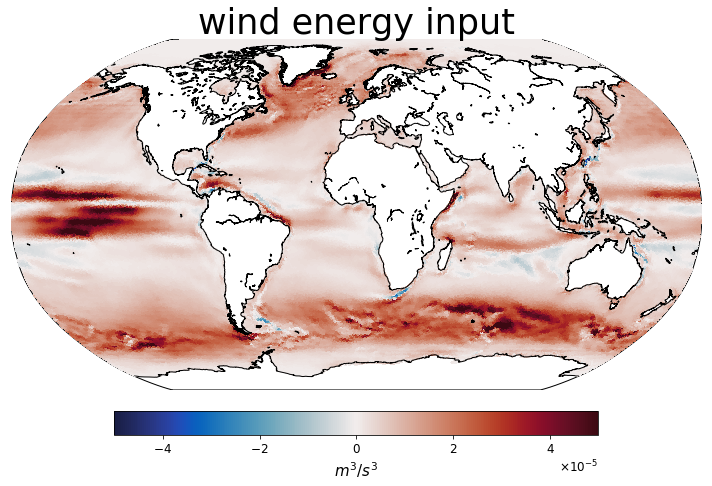

In [34]:
vmin=-5.e-5
vmax=5.e-5
steps = 50

# data = data_ssh_rhs
# data = data_rhs_diag-data_ssh_rhs
# data = (data_rhs_diag-data_ssh_rhs)/data_ssh_rhs
plt.figure(figsize=(10,10))
m.drawmapboundary()
m.drawcoastlines()
mm = plt.tripcolor(x, y, elem2, wind_m[mesh.no_cyclic_elem], edgecolors='none', cmap=cmo.balance, vmin = vmin, vmax = vmax)
desc="wind energy input"
cbartext = '${m^3}/{s^3}$'
cb = plt.colorbar(mm, orientation = 'horizontal', shrink=0.7, pad = 0.03, format=sfmt)
cb.ax.set_xlabel(cbartext, size = 15)
plt.title(desc, size = 35)
plt.tight_layout()

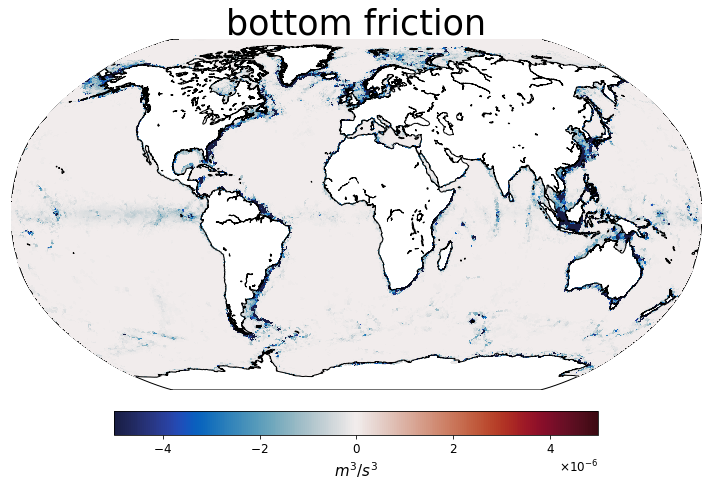

In [35]:
vmin=-5.e-6
vmax=5.e-6
steps = 50

# data = data_ssh_rhs
# data = data_rhs_diag-data_ssh_rhs
# data = (data_rhs_diag-data_ssh_rhs)/data_ssh_rhs
plt.figure(figsize=(10,10))
m.drawmapboundary()
m.drawcoastlines()
mm = plt.tripcolor(x, y, elem2, fric_m[mesh.no_cyclic_elem], edgecolors='none', cmap=cmo.balance, vmin = vmin, vmax = vmax)
desc="bottom friction"
cbartext = '${m^3}/{s^3}$'
cb = plt.colorbar(mm, orientation = 'horizontal', shrink=0.7, pad = 0.03, format=sfmt)
cb.ax.set_xlabel(cbartext, size = 15)
plt.title(desc, size = 35)
plt.tight_layout()

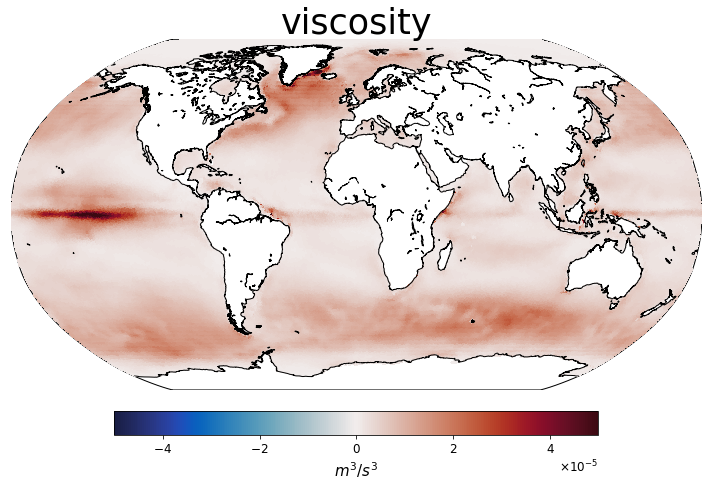

In [36]:
vmin=-5.e-5 
vmax=5.e-5
steps = 50

# data = data_ssh_rhs
# data = data_rhs_diag-data_ssh_rhs
# data = (data_rhs_diag-data_ssh_rhs)/data_ssh_rhs
plt.figure(figsize=(10,10))
m.drawmapboundary()
m.drawcoastlines()
#mm = plt.tripcolor(x, y, elem2, visc_m[mesh.no_cyclic_elem].compute(), edgecolors='k', cmap=cmo.balance, vmin=vmin, vmax=vmax)
mm = plt.tripcolor(x, y, elem2, visc_m[mesh.no_cyclic_elem].compute(), edgecolors='none', cmap=cmo.balance, vmin = vmin, vmax = vmax)
desc="viscosity"
cbartext = '${m^3}/{s^3}$'
cb = plt.colorbar(mm, orientation = 'horizontal', shrink=0.7, pad = 0.03, format=sfmt)
cb.ax.set_xlabel(cbartext, size = 15)
plt.title(desc, size = 35)
plt.tight_layout()

In [37]:
#arr=[(-wrho_m1*nod_area[0,:]).sum(), (wind_m*nod_area[0,:]).sum(), -(fric_m*nod_area[0,:]).sum(), -(visc_m*nod_area[0,:]).sum()]
arr=[wrho_NET, (wind_m*elem_area).sum(), (fric_m*elem_area).sum(), -visc_NET]
arr=np.array(arr)*1.e-9

In [38]:
arr.sum()

0.4727833590247852

In [39]:
arr

array([-0.41164588,  3.15044703, -0.19100026, -2.07501753])